# "ResNet-8" Classifier

- [Training Dataset](https://huggingface.co/datasets/uoft-cs/cifar10)
- [Corrupt Dataset](https://huggingface.co/datasets/robro/cifar10-c-parquet)

```
@article{
    hendrycks2019benchmarking, 
    title={Benchmarking neural network robustness to common corruptions and perturbations}, 
    author={Hendrycks, Dan and Dietterich, Thomas}, 
    journal={arXiv preprint arXiv:1903.12261}, 
    year={2019} 
}
```

---

- Dataaset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)
- https://debuggercafe.com/building-resnets-from-scratch-using-pytorch/
- https://towardsdev.com/implement-resnet-with-pytorch-a9fb40a77448

## Install

In [192]:
%pip install torch torchvision matplotlib numpy scikit-learn tqdm pandas datasets torchinfo

Note: you may need to restart the kernel to use updated packages.


## Import

In [193]:
import torch

In [194]:
device = torch.device("cuda" if torch.cuda.is_available() else
                      "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Device: {device}")

Device: mps


## Load CIFAR10-C

In [195]:
from datasets import load_dataset
import io

t_dataset = load_dataset("uoft-cs/cifar10", split="train", trust_remote_code=False)
r_dataset = load_dataset("robro/cifar10-c-parquet", split="train", trust_remote_code=False)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck",]

# def decode_bytes_to_pil(col: str):
#     def make_image(ds):
#         # if "bytes" in ds[col]:
#             # ds[col] = Image.open(io.BytesIO(ds[col]["bytes"]))
#         ds[col] = Image.open(ds[col])
#         return ds
#     return make_image
# t_dataset = t_dataset.map(decode_bytes_to_pil("img"))
# r_dataset = r_dataset.map(decode_bytes_to_pil("image"))

t_df_dataset = t_dataset.to_pandas()
r_df_dataset = r_dataset.to_pandas()

display(t_df_dataset)
display(r_df_dataset)

,img,label
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,0
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,6
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,0
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,2
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,7
...,...,...
49995,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,3
49996,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,9
49997,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1
49998,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1


,image,label,corruption_name,corruption_level
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,3,zoom_blur,1
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,8,zoom_blur,1
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,8,zoom_blur,1
3,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,0,zoom_blur,1
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,6,zoom_blur,1
...,...,...,...,...
949995,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,8,brightness,5
949996,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,3,brightness,5
949997,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,5,brightness,5
949998,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,brightness,5


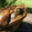

Label: frog


In [196]:
from PIL import Image
import io

example = t_df_dataset.iloc[1]
image = example["img"]
label = example["label"]

stream = io.BytesIO(image['bytes'])
img = Image.open(stream)

display(img)
print(f"Label: {classes[label]}")

In [197]:
# import torch
# import torchvision.transforms as transforms

# # Define a function to convert PIL images to tensors
# def transform_to_tensor(row):
#     if isinstance(row["img"], dict) and "bytes" in row["img"]:
#         img = Image.open(io.BytesIO(row["img"]["bytes"]))
#     elif isinstance(row["img"], bytes):
#         img = Image.open(io.BytesIO(row["img"]))
#     else:
#         img = row["img"]
#     row["pixel_values"] = transforms.ToTensor()(img)
#     return row

# # Function to calculate mean and std
# def calculate_mean_std(dataset):
#     # Stack all the tensors in the dataset into a single 4D tensor of shape (num_images, 3, 32, 32).
#     pixel_values = [example["pixel_values"] for example in dataset]
#     all_images = torch.stack(pixel_values)
#     # Calculate mean and std for each channel (R, G, B)
#     mean = all_images.mean(dim=[0, 2, 3])  # Mean over batch, height, width
#     std = all_images.std(dim=[0, 2, 3])    # Std over batch, height, width
#     return mean, std

# t_dataset = t_dataset.map(transform_to_tensor)
# # display(t_dataset.to_pandas())
# mean, std = calculate_mean_std(t_dataset)

# print("Mean:", mean)
# print("Std:", std)

### Augment Dataset

Here we are augmenting the training dataset with some slight tweaks to better train the model (flipping, etc). This helps the model become more robust to small variations, which is good generalization (we can remove this if needed).

We **do not** augment the curropt dataset, but we do normalize it.

In [ ]:
from datasets import load_dataset
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Data augmentation artificially expands the training set by creating
# plausible variations of the input images. This reduces overfitting and
# improves generalization for small datasets.
# Should we do this?
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # Normalize(mean, std): Normalizes the tensor using the mean and standard
    # deviation of the CIFAR-10 dataset. The values (0.4914, 0.4822, 0.4465)
    # and (0.2023, 0.1994, 0.2010) are precomputed for CIFAR-10.
    # Need to calulate these myself...
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Apply to datasets
t_dataset.set_transform(lambda x: {"pixel_values": train_transform(x["img"]), "labels": x["label"]})
r_dataset.set_transform(lambda x: {"pixel_values": test_transform(x["image"]), "labels": x["label"]})



# Convert to PyTorch Dataset
def transform_fn(examples):
    examples["pixel_values"] = [train_transform(image.convert("RGB")) for image in examples["img"]]
    examples["labels"] = [int(label) for label in examples["label"]]
    return examples

t_dataset.set_transform(transform_fn)

# Create DataLoader
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["labels"] for example in examples])
    return pixel_values, labels

train_loader = DataLoader(t_dataset, batch_size=128, shuffle=True, collate_fn=collate_fn)


## Model

ResNet-8:

- Input: 32x32 (CIFAR-10)
- Channels: 16 → 32 → 64
- Blocks: 2 per stage (total 6 blocks + initial conv)
- Parameters: ~0.3M–0.7M (can adjust channels to match ViT-Tiny)

In [199]:
import torch
import torch.nn as nn
import torch.nn.functional as F

There are 3 main components that make up the ResNet.

1. input layer (conv1 + max pooling) (Usually referred to as layer 0)
2. ResBlocks (conv2 without max pooing ~ conv5) (Usually referred to as layer1 ~ layer4)
3. final layer

In [200]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

In [201]:
class ResNet8(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.in_channels = 16  # Start with 16 channels

        # Initial conv layer
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)

        # Two layers per stage, with channel doubling each stage
        self.layer1 = self._make_layer(16, 2, stride=1)  # 16 channels
        self.layer2 = self._make_layer(32, 2, stride=2)  # 32 channels
        self.layer3 = self._make_layer(64, 2, stride=2)  # 64 channels

        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, out_channels, blocks, stride):
        strides = [stride] + [1] * (blocks - 1)
        layers = []
        for stride in strides:
            layers.append(BasicBlock(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, 8)  # Global average pool for 32x32 input
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [202]:
from torchinfo import summary

resnet8 = ResNet8(10).to(device)
summary(resnet8, (1, 3, 32, 32))  # Batch size of 1

Layer (type:depth-idx)                   Output Shape              Param #
ResNet8                                  [1, 10]                   --
├─Conv2d: 1-1                            [1, 16, 32, 32]           432
├─BatchNorm2d: 1-2                       [1, 16, 32, 32]           32
├─Sequential: 1-3                        [1, 16, 32, 32]           --
│    └─BasicBlock: 2-1                   [1, 16, 32, 32]           --
│    │    └─Conv2d: 3-1                  [1, 16, 32, 32]           2,304
│    │    └─BatchNorm2d: 3-2             [1, 16, 32, 32]           32
│    │    └─Conv2d: 3-3                  [1, 16, 32, 32]           2,304
│    │    └─BatchNorm2d: 3-4             [1, 16, 32, 32]           32
│    │    └─Sequential: 3-5              [1, 16, 32, 32]           --
│    └─BasicBlock: 2-2                   [1, 16, 32, 32]           --
│    │    └─Conv2d: 3-6                  [1, 16, 32, 32]           2,304
│    │    └─BatchNorm2d: 3-7             [1, 16, 32, 32]           32
│    